In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  # for charts
import matplotlib as mpl  # plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import *
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform

In [2]:
dtr = pd.read_csv('Train.csv', na_values=[' ?', 'UNDEFINED', ' '])
dte = pd.read_csv('Test.csv', na_values=[' ?', 'UNDEFINED'])
DF_train = pd.DataFrame(dtr)
DF_test = pd.DataFrame(dte)
DF_train.drop_duplicates()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,3.17,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
27994,19/10/2018 14:45,54.36,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load
27995,19/10/2018 15:00,56.63,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load
27996,19/10/2018 15:15,62.50,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load
27997,19/10/2018 15:30,89.68,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load


In [3]:
DF_train['date'] = pd.to_datetime(DF_train['date'], format='%d/%m/%Y %H:%M')
DF_train['day'] = DF_train['date'].dt.day
DF_train['month'] = DF_train['date'].dt.month
DF_train['year'] = DF_train['date'].dt.year
DF_train['hour'] = DF_train['date'].dt.hour
DF_train['minute'] = DF_train['date'].dt.minute

In [4]:
DF_test['date'] = pd.to_datetime(DF_test['date'], format='%d/%m/%Y %H:%M')
DF_test['day'] = DF_test['date'].dt.day
DF_test['month'] = DF_test['date'].dt.month
DF_test['year'] = DF_test['date'].dt.year
DF_test['hour'] = DF_test['date'].dt.hour
DF_test['minute'] = DF_test['date'].dt.minute

In [5]:
from sklearn.preprocessing import LabelEncoder
categ = DF_train.select_dtypes(include = "object").columns

le = LabelEncoder()
DF_train[categ] = DF_train[categ].apply(le.fit_transform)

DF_train.head()

categ = DF_test.select_dtypes(include = "object").columns

le = LabelEncoder()
DF_test[categ] = DF_test[categ].apply(le.fit_transform)


In [6]:
DF_train.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year,hour,minute
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,1,1,2018,0,15
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,1,1,2018,0,30
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,1,1,2018,0,45
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,1,1,2018,1,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,1,1,2018,1,15


In [7]:
mean = DF_train['Leading_Current_Power_Factor'].mean()
DF_train['Leading_Current_Power_Factor'].fillna(mean, inplace=True)
mean = DF_train['Leading_Current_Reactive_Power_kVarh'].mean()
DF_train['Leading_Current_Reactive_Power_kVarh'].fillna(mean, inplace=True)

mean = DF_test['Leading_Current_Power_Factor'].mean()
DF_test['Leading_Current_Power_Factor'].fillna(mean, inplace=True)
mean = DF_test['Leading_Current_Reactive_Power_kVarh'].mean()
DF_test['Leading_Current_Reactive_Power_kVarh'].fillna(mean, inplace=True)
DF_train.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year,hour,minute
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,1,1,2018,0,15
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,1,1,2018,0,30
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,1,1,2018,0,45
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,1,1,2018,1,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,1,1,2018,1,15


In [8]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), ['Usage_kWh'])])
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), ['Lagging_Current_Reactive.Power_kVarh'])])
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), ['Leading_Current_Reactive_Power_kVarh'])])
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), ['Lagging_Current_Power_Factor'])])
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), ['Leading_Current_Power_Factor'])])

In [9]:
DF_train.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,day,month,year,hour,minute
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,1,1,2018,0,15
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,1,1,2018,0,30
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,1,1,2018,0,45
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,1,1,2018,1,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,1,1,2018,1,15


In [10]:
DF_train['date'] = pd.to_numeric(pd.to_datetime(DF_train['date']))
DF_test['date'] = pd.to_numeric(pd.to_datetime(DF_test['date']))

In [11]:
# X = DF_train.drop(['date','Usage_kWh'], axis = 1)
# y = DF_train['Usage_kWh']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train = DF_train.drop(['Usage_kWh','date'], axis=1)
X_test = DF_test.drop(['Usage_kWh','date'], axis=1)
y_train = DF_train.Usage_kWh
y_test = DF_test.Usage_kWh


In [13]:
print(LinearRegression().get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [14]:
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

param_dist = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2, 4],
    'positive': [True, False],
}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(LinearRegression(), param_dist, cv=5, n_iter=10, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

grid_pred = grid_search.predict(X_test)
random_pred = random_search.predict(X_test)

grid_mse = mean_squared_error(y_test, grid_pred)
grid_r2 = r2_score(y_test, grid_pred)
random_mse = mean_squared_error(y_test, random_pred)
random_r2 = r2_score(y_test, random_pred)

print("Grid Search Mean Squared Error: ", grid_mse)
print("Grid Search R2 Score: ", grid_r2)
print("Random Search Mean Squared Error: ", random_mse)
print("Random Search R2 Score: ", random_r2)


D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

Grid Search Mean Squared Error:  13.6206753024738
Grid Search R2 Score:  0.9861906094546813
Random Search Mean Squared Error:  13.6206753024738
Random Search R2 Score:  0.9861906094546813


D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
D:\Programs\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

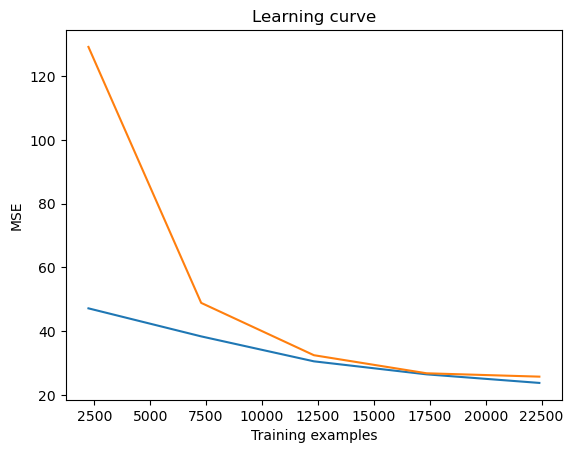

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
# Define the number of folds
n_folds = 5
# Define the cross-validation method
kf = KFold(n_splits=n_folds)
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training examples')
plt.ylabel('MSE')
plt.show()
DF_train[[ 'Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']] = scaler.fit_transform(DF_train[['Lagging_Current_Reactive.Power_kVarh','CO2(tCO2)','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']])
DF_test[[ 'Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']] = scaler.transform(DF_test[['Lagging_Current_Reactive.Power_kVarh','CO2(tCO2)','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM']])